<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Вычислительной техники </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №2</font></center>
<center><font size="3">по дисциплине: «Системы искусственного интеллекта и машинное обучение» </font></center>
<br>

- Выполнил: _ _ _ Москвин Т.А. _ _ _
- Вариант 223
- Проверил: _ _ _ Осипенко И.В. _ _ _
- Новосибирск, 2024

## Цель работы

Исследование влияния операции приведения данных к новым шкалам (стандартизации) на обучение моделей МО при решении задачи регрессии, с использованием библиотеки scikit-learn.
Знакомство с приемом перекрестной проверки данных (cross-validation).

## Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

1. Загрузка данных

    1.1. Выполните загрузку файла с подготовленным набором данных (очищенный от пропусков и выбросов для целевой и независимых переменных) в таблицу _df_
   
    1.2. Объявите список независимых и целевой переменных
   
    1.3. Оставьте в таблице данных _df_ столбцы, относящиеся только к списку независимых и целевой переменных
   


2. Выполните процедуры стандартизации каждого признака (столбца) и сохраните их в отдельную таблицу _df_scaled_

    2.1. Получите величину среднего значения и среднеквадратического отклонения для целевой переменной
   
    2.2. Для целевой переменной постройте гистограммы распределения стандартизированых и  исходных значений
   
  
3. Разделите каждую из таблиц _df_ и _df_scaled_ на обучающую и проверочную части:

    3.1. Выберите значение для начального состояния генератора случайных чисел (ГСЧ)

    3.2. Получите результат разделения таблицы _df_ (НЕ стандартизированная выборка): _x__train_ , _x__test_ , _y__train_ , _y__test_
    3.3. Получите результат разделения таблицы _df_scaled_ (Стандартизированная выборка): _xStd__train_ , _xStd__test_ , _yStd__train_ , _yStd__test_
   

4. Постройте две модели методом SGDRegressor: на НЕ стандартизированных  (m1) и на стандартизированных (m2) данных. Для каждой из моделей m1, m2:

    4.1. Получите метрики RMSE, R2
   
    4.2. Постройте диаграмму рассеяния вычисленных значений от проверочных значений
   
    4.3. Постройте гистограмму остатков (разностей между вычисленными и проверочными)
   


5. Вернитесь к части соответствующей пункту 3.1 и измените значение для начального состояния генератора случайных чисел (ГСЧ). Повторите разделение и вычисления соостветсвующие п. 3.2, 4.1 - 4.3 хода работы

6. Сравните полученные результаты и сделайте заключение о:

    6.1. Влиянии операции стандартизации на точность моделей (изменение R^2 и RMSE у моделей m1 и m2)
    
    6.2. Влиянии перемешивания при разделении (изменение R^2 и RMSE при различных rand_seed),  
   
7. Используя модель SGDRegressor и прием кросс-валидации получите на проверочной части (*_test) НЕ стандартизированных и стандартизированных данных следующие оценки точности:

    7.1. R2(коэфф. детерминации)
   
    7.2. RMSE (среднеквадратичное отклонение)


|Оценка|на станд.| на НЕ станд.|
|-|-|-|
|Разделений|k=...|
|R2|[r2Std_1, r2Std_2, ...]|[r2_1, r2_2, ...]|
|R2 средн| 0.xx|0.xx|
|RMSE|[rmseStd_1, rmseStd_2, ...]|[rmse_1, rmse_2, ...]|
|RMSE средн|x.xx|x.xx|

8. Проведите сравнение полученных значений и сделайте заключение о велечине коридора изменений оценок моделей

## Введение

В качестве целевой переменной был взят 'price'. В качестве независимых признаков - 'x', 'cut_Ideal', 'table',  'carat'.


# Подключение библиотек
Для начала подключим все нужные библиотеки, проверив версию основных из них.

In [1]:
# Python 3.8
import pandas as pd
import numpy  as np

from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
import  sklearn
print("версия scikit-learn: {}".format(sklearn.__version__))
print("версия pandas: {}".format(pd.__version__))
print("версия numpy: {}".format(np.__version__))

версия scikit-learn: 1.5.2
версия pandas: 2.2.2
версия numpy: 1.26.4


# Объявление функций

Для повышения повторяемости кода и повышения уровня читаемости объявим несколько функций с уже знакомыми операциями

In [3]:
def PLOT34(y_test, y_pred):
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    plt.figure(figsize=(12,6))

    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1)
    plt.scatter(y_test, y_test,  alpha=0.1)
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')


    # == Диаграмма рассеяния ошибок ==
    # создать второе полотно 122: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1)
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
#--------------------------------------------------------------------------

In [4]:
def GET_METRICS_SINGLE(y_test, y_pred):
    '''
    Вычисление и вывод метрик: MAE, RMSE, R2.
    На основе сравнения проверочных и вычисленных.
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    mse  = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score                   (y_test, y_pred)

    print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
    print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
    print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
    print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))
#--------------------------------------------------------------------------

# Загрузка подготовленных данных

Загружаем обработанные данные из ЛР 1

In [6]:
df = pd.read_csv('./concrete_nan_PREPARED.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                   header=0, # номер строки с заголовками, нумерация с нуля
                   # header='None', # если заголовки отсутствуют
                  )
print("Размер таблицы", df.shape)
df[:2]

Размер таблицы (906, 9)


,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03
1,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45


Запишем независимые признаки в features, а целевую переменную в target

In [7]:
features = ['Cement', 'Water', 'Superplasticizer',  'Age', ]
target   = ['Concrete_compressive_strength']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         906 non-null    float64
 1   Blast_Furnace_Slag             906 non-null    float64
 2   Fly_Ash                        906 non-null    float64
 3   Water                          906 non-null    float64
 4   Superplasticizer               906 non-null    float64
 5   Coarse_Aggregate               906 non-null    float64
 6   Fine_Aggregate                 906 non-null    float64
 7   Age                            906 non-null    float64
 8   Concrete_compressive_strength  906 non-null    float64
dtypes: float64(9)
memory usage: 63.8 KB


Для выполнения следующих шагов разделим исходую таблицу на две отдельных
  - dfX содержащую только объясняющие признаки
  - dfY содержащую только целевой объясняемый признак

In [8]:
dfX = df[features]
print("Размер таблицы", dfX.shape)
dfX[:2]

Размер таблицы (906, 4)


,Cement,Water,Superplasticizer,Age
0,266.0,228.0,0.0,90.0
1,380.0,228.0,0.0,28.0


In [9]:
dfY = df[target]
print("Размер таблицы", dfY.shape)
dfY[:2]

Размер таблицы (906, 1)


,Concrete_compressive_strength
0,47.03
1,36.45


# Приведение к новой шкале значений

Важнейшими числовыми характеристиками случайной величины являются:

- Математическое ожидание, имеющее смысл среднего значения  (mean)  $ {\\mu} $ (мю) - центр распределения случайной величины
      .mean()
      
- Среднеквадратическое отклонение (Standard_deviation) $ {\\sigma} $ (сигма) - показатель рассеивания относительно её мат. ожидания.
      .std()
      
- Дисперсия (Variance) $ {\\var = sigma^2} $ (сигма в квадрате) - мера разброса относительно её мат. ожидания.
      .var  =  .std()**2


Некоторые методы машинного обучения 
сильно чувствительны к шкалированию данных. 

При подготовки данных чаще всего выполняются процедуры: 

- либо __нормализации__  -  приведения значений к диапазону от 0.0 до 1.0 Пример:
      
      |--------------|+++++++++|----|
      |--------------|++++++++++++++|
      0             1900     1970  2000
      
      Обрабатываемое: 1970
      Макс. значение: 1900
      Мин. значение:  2000
      
      Процедура нормализации:
      x_norm = ( x - X.min() ) / ( X.max() -  X.min() )
      x_norm = ( 1970 - 1900 ) / (2000 - 1900)
      x_norm = 70 / 100
      x_norm = 0.70
      
      Восстановление:
      x = ( x_norm * ( X.max() -  X.min() ) +  X.min()
      x = ( 0.70 * (2000 - 1900) + 1900
      x = ( 0.70 * 100) + 1900
      x = 70 + 1900
      x = 1970



- либо __стандартизации__ - предобработки данных, после которой каждый признак имеет среднее (mean) = 0 и дисперсию (variance) = 1. Стандартизовать - вычесть среднее и поделить на стандартное отклонение. Критично для линейных моделей.
      X_stantartised = (X - X.mean()) / X.std()

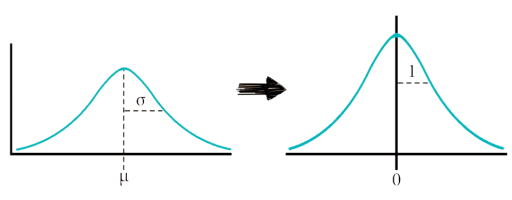
<p style="text-align: right;"> Рис. 1. Вид гистограмм до и после стандартизации </p>

"Одно из наиболее важных допущений при работе с линейными моделями, параметры которых оцениваются методом наименьших квадратов, состоит в том, что остатки модели независимы (т.е. не коррелируют) и имеют нормальное распределение со средним значением 0 и некоторым фиксированным стандартным отклонением"

Среднекв. откл. (Stand._dev.) 22.698774746668597
Дисперсия (Variance)  515.234375
Среднее (Mean) 1948.125


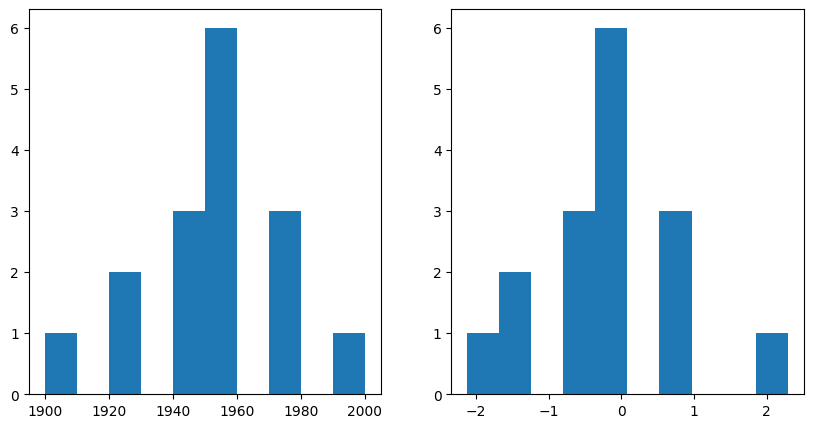

In [10]:
# Пример операции стандартизации
df_ex1 = pd.DataFrame(
  np.array([1900,1920,1920,1940,1940,1940,1950,1950,1950,1950,1950,1950,1970,1970,1970,2000 # последовательность
  ]),
  columns=["Year"]
)

print ("Среднекв. откл. (Stand._dev.)", df_ex1.std(ddof=0).iloc[0])
print ("Дисперсия (Variance) ", df_ex1.var(ddof=0).iloc[0])
print ("Среднее (Mean)", df_ex1.mean().iloc[0])

# X_stantartised = (X - X.mean()) / X.std()
df_Std = (df_ex1 - df_ex1.mean())/df_ex1.std(ddof=0)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(df_ex1["Year"])
plt.subplot(122)
plt.hist(df_Std["Year"]);

## Стандартизация. Способ #1

Благодаря наличию функций вычисления статистических характеристик в библиотеке pandas, стандартизацию можно выполнить прямым вычислением.

In [11]:
dfX_scaled = (dfX - dfX.mean()) / dfX.std(ddof=0) # обязательный параметр ddof=0
dfX_scaled[:2]

,Cement,Water,Superplasticizer,Age
0,-0.08380,2.492207,-1.165541,2.048065
1,1.06068,2.492207,-1.165541,-0.142955


In [12]:
dfY_scaled = (dfY - dfY.mean()) / dfY.std(ddof=0) # обязательный параметр ddof=0
dfY_scaled[:2]

,Concrete_compressive_strength
0,0.762549
1,0.111786


## Стандартизация. Способ #2.

В библиотеке scikit-learn, для выполнения процедуры стандартизации, присутствует более удобный класс __sklearn.preprocessing.StandardScaler__, который содержит методы:

- __StandardScaler.fit(  X  )__ - вычисление значений __среднего__ и __дисперсии__

- __StandardScaler.transform( X )__ - прямого преобразования из истинного значения к приведенному

- __StandardScaler.inverse_transform( X )__ - обратного преобразования из приведенного значения в истинное

In [13]:
from sklearn.preprocessing import StandardScaler
scalerStdX = StandardScaler()
scalerStdY = StandardScaler()

In [14]:
#  вычисление значений среднего и дисперсии отдельно для каждого признака
scalerStdX.fit (dfX)
scalerStdY.fit (dfY)

StandardScaler()

In [15]:
print (" {:>3} {:<25} {:>16} {:>16}".format(
 "№", "Признак", "Средрее", "Ср.кв.откл."
))

for icol in range (0, len(dfX.columns)):
    print (" {:>3} {:<25} {:>16.3f} {:>16.3f}".format(
                   icol,
                   dfX.columns[icol],
                   scalerStdX.mean_[icol],
                   np.sqrt ( scalerStdX.var_[icol]), # кв. корень (из дисперсии)
                  ))

   № Признак                            Средрее      Ср.кв.откл.
   0 Cement                             274.347           99.609
   1 Water                              180.325           19.130
   2 Superplasticizer                     6.351            5.449
   3 Age                                 32.045           28.297


При прямом преобразовании значений (функция transform()) данные возвращаются без информации о принадлежности к строкам и столбцам.

In [16]:
# Пример для осмотра предварительного результата
scalerStdX.transform(dfX)

array([[-0.08380047,  2.49220696, -1.16554125,  2.04806452],
       [ 1.06067999,  2.49220696, -1.16554125, -0.14295535],
       [-0.08380047,  2.49220696, -1.16554125, -0.14295535],
       ...,
       [-1.2634185 ,  0.64691713, -0.04606258, -0.14295535],
       [-1.15700189, -0.24697682,  0.90824711, -0.14295535],
       [-0.13500091,  1.05988567,  0.41274015, -0.14295535]])

Для удобства восприятия сформируем новую таблицу (DataFrame) с указанием названий признаков и идентификаторов строк, соответствующих таблице-оригиналу.

In [17]:
# создать новую таблицу (DataFrame)
# со стандартизированными значениями

dfXStd = pd.DataFrame (
  data    = scalerStdX.transform(dfX), # значения ячеек    <<--
  columns = dfX.columns,           # названия столбцов
  index   = dfX.index              # идентификаторы строк
)
print("Размер таблицы", dfXStd.shape)
dfXStd[:2]

Размер таблицы (906, 4)


,Cement,Water,Superplasticizer,Age
0,-0.08380,2.492207,-1.165541,2.048065
1,1.06068,2.492207,-1.165541,-0.142955


In [18]:
# создать новую таблицу (DataFrame)
# со стандартизированными значениями

dfYStd = pd.DataFrame (
  data    = scalerStdY.transform(dfY), # значения ячеек    <<--
  columns = dfY.columns,           # названия столбцов
  index   = dfY.index              # идентификаторы строк
)
print("Размер таблицы", dfYStd.shape)
dfYStd[:2]

Размер таблицы (906, 1)


,Concrete_compressive_strength
0,0.762549
1,0.111786


Используя класс  __sklearn.preprocessing.StandardScaler__ становится доступна операция обратного предобразования к исходным НЕ стандартизированным значениям. Этот прием пригодится позже при работе с обученной моделью.

In [19]:
# строка в стандартизированном виде
dfYStd [0:1]

,Concrete_compressive_strength
0,0.762549


In [20]:
# Результат обратного преобразования обернутый в таблицу (DataFrame)
pd.DataFrame (
    scalerStdY.inverse_transform(
        dfYStd [0:1]  ),
    columns = dfY.columns,
)

,Concrete_compressive_strength
0,47.03


In [21]:
df [0:1]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03


## Информация по целевой переменной
Получим величину среднего значения и дисперсии для целевой переменной

In [22]:
scalerStdY.fit (dfY)

print (" {:>3} {:<25} {:>16} {:>16}".format(
 "№", "Целевая переменная", "Среднее", "Дисперсия."
))
print (" {:>3} {:<25} {:>16.8f} {:>16.8f}".format( 
                   0,
                   dfY.columns[0],
                   scalerStdY.mean_[0],
                   scalerStdY.var_[0],
                  )
          )

   № Целевая переменная                 Среднее       Дисперсия.
   0 Concrete_compressive_strength      34.63259382     264.31798323


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,906.0,274.347241,99.663532,102.00,190.7000,255.15,339.000,528.0
Blast_Furnace_Slag,906.0,74.285982,87.199507,0.00,0.0000,21.00,144.925,359.4
Fly_Ash,906.0,58.016887,64.149092,0.00,0.0000,0.00,118.300,200.1
Water,906.0,180.324614,19.140352,126.60,164.9000,183.90,192.000,228.0
Superplasticizer,906.0,6.350993,5.451975,0.00,0.0000,7.00,10.400,23.4
Coarse_Aggregate,906.0,973.790728,77.153714,801.00,932.0000,968.00,1029.400,1145.0
Fine_Aggregate,906.0,778.665011,76.501808,594.00,741.7500,780.10,825.000,992.6
Age,906.0,32.045254,28.312954,1.00,7.0000,28.00,28.000,120.0
Concrete_compressive_strength,906.0,34.632594,16.266839,2.33,22.5775,33.40,44.520,78.8


In [24]:
dfYStd.describe().T

,count,mean,std,min,25%,50%,75%,max
Concrete_compressive_strength,906.0,1.254822e-16,1.000552,-1.986891,-0.741493,-0.075815,0.608162,2.71668


In [25]:
dfXStd.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,906.0,-3.293907e-16,1.000552,-1.730246,-0.839760,-0.192727,0.649069,2.546497
Water,906.0,-1.003857e-15,1.000552,-2.808427,-0.806314,0.186902,0.610325,2.492207
Superplasticizer,906.0,3.137054e-17,1.000552,-1.165541,-1.165541,0.119106,0.743078,3.128852
Age,906.0,-1.254822e-16,1.000552,-1.097109,-0.885075,-0.142955,-0.142955,3.108235


Построим гистограммы распределения исходных и стандартизированных значений для целевого признака

(array([ 37., 119., 133., 145., 174., 113.,  80.,  52.,  29.,  24.]),
 array([-1.98689099, -1.51653386, -1.04617673, -0.57581959, -0.10546246,
         0.36489467,  0.83525181,  1.30560894,  1.77596607,  2.2463232 ,
         2.71668034]),
 <BarContainer object of 10 artists>)

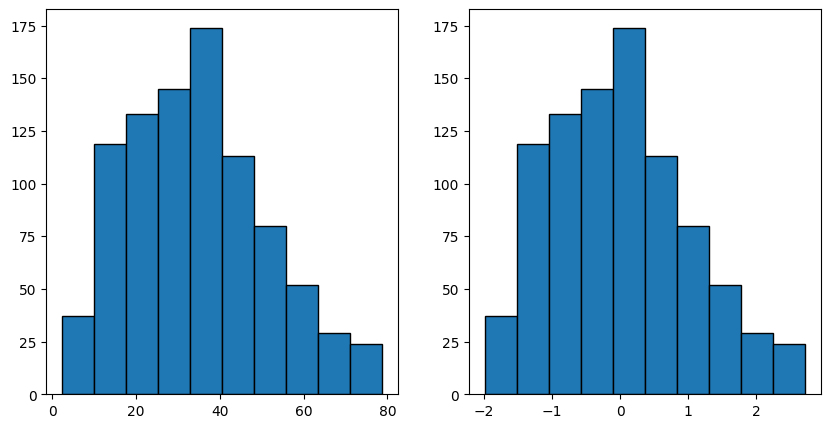

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(dfY.values , edgecolor = 'black')
plt.subplot(122)
plt.hist(dfYStd.values , edgecolor = 'black')

# Формирование тренировочной и проверочной выборок

In [27]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

##  НЕ Стандартизованные

In [28]:
x_train, x_test, y_train, y_test =  train_test_split(
    df[features],    # исходные данные X
    df[target],      # исходные данные y
    
    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
) 
y_train = y_train['Concrete_compressive_strength']
y_test = y_test['Concrete_compressive_strength']

x_train[:2]

,Cement,Water,Superplasticizer,Age
585,236.0,192.0,0.0,3.0
826,299.8,211.5,9.9,28.0


In [29]:
y_train[:2]

585    13.57
826    23.84
Name: Concrete_compressive_strength, dtype: float64

In [30]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
))

Кол-во элементов: 
  x_train: 634, y_train 634 
  x_test:  272, y_test  272 
  total x: 906, total y 906 


## Стандартизованные

In [32]:
xStd_train, xStd_test, yStd_train, yStd_test =  train_test_split(
    dfXStd,    # исходные данные X
    dfYStd,      # исходные данные y
    
    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
) 

yStd_train = yStd_train['Concrete_compressive_strength']
yStd_test = yStd_test['Concrete_compressive_strength']


xStd_train[:2]

,Cement,Water,Superplasticizer,Age
585,-0.384980,0.610325,-1.165541,-1.026431
826,0.255528,1.629678,0.651318,-0.142955


In [33]:
yStd_train[:2]

585   -1.295533
826   -0.663839
Name: Concrete_compressive_strength, dtype: float64

# Проверка влияния стандартизации

Для исследования влияния процесса стандартизации используем новый тип модели - __linear_model.SGDRegressor__. Особенности внутреннего устройства рассматривать пока не будем.

В библиотеке sklearn большинство методов обладают единым интерфейсом взаимодействия и содержат методы
```
- model.fit(x_train, y_train) - обучение модели, вычисление коэфф. для входных признаков

- y_pred = model.predict(x_test) - прогноз модели, вычисление откликов
```

## Модель SGDRegressor. НЕ стандартизованные (rand_seed = 8)

In [34]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
rand_seed = 8
sgd_reg_nonStd = linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=8,
)
# 2. Обучить модель (подобрать/подогнать параметры модели)  на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
sgd_reg_nonStd.fit(  x_train,  y_train)
# 3. Получить вычисленные(predicted) зн. на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
y_pred = sgd_reg_nonStd.predict ( x_test)
y_pred

array([1.04566179e+14, 1.26947473e+14, 1.34279215e+14, 1.28210214e+14,
       1.35354215e+14, 1.16726934e+14, 1.21898745e+14, 1.38462782e+14,
       1.14890545e+14, 1.25682753e+14, 1.01074057e+14, 9.03643174e+13,
       1.23512030e+14, 1.16124570e+14, 1.48563084e+14, 1.20528204e+14,
       1.03932858e+14, 1.63313213e+14, 1.49642838e+14, 1.26719834e+14,
       1.29606333e+14, 8.84257964e+13, 1.17982105e+14, 1.02432450e+14,
       1.04656568e+14, 1.33788263e+14, 8.46411371e+13, 1.09531709e+14,
       1.15603690e+14, 9.65322764e+13, 1.50195119e+14, 1.21598647e+14,
       9.92497852e+13, 1.26968226e+14, 1.48176537e+14, 1.15890944e+14,
       1.15494023e+14, 1.07881355e+14, 1.21222102e+14, 8.89344690e+13,
       8.93304242e+13, 1.07118454e+14, 1.06372587e+14, 1.24558822e+14,
       1.10275932e+14, 9.00496097e+13, 9.76856282e+13, 1.16726934e+14,
       8.67332719e+13, 1.69089521e+14, 1.30929605e+14, 1.26609161e+14,
       1.05295384e+14, 1.14910924e+14, 1.01894566e+14, 1.39708641e+14,
      

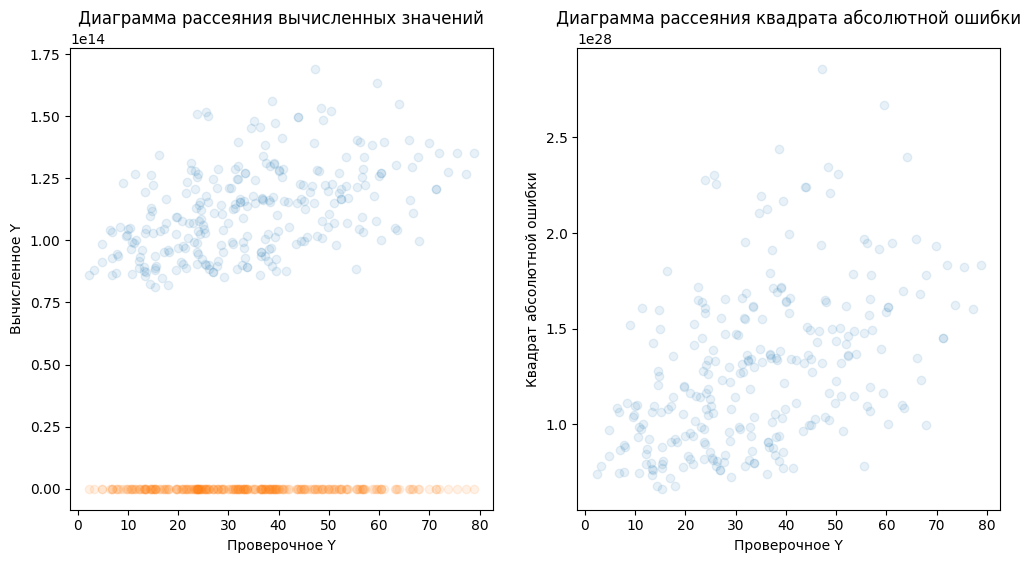

In [35]:
PLOT34(y_test, y_pred)

In [36]:
GET_METRICS_SINGLE(y_test, y_pred)

MAE : 111,893,410,552,350.594 (средняя абсолютная ошибка)
MSE : 12,841,821,867,164,034,474,780,393,472.000000 (среднеквадратичная ошибка)
RMSE: 113,321,762,548,788.640625 (кв. корень из среднеквадратичной ошибки)
R2  : -44,776,162,826,824,839,497,515,008.000 (коэфф. детерминации)


Построим гистограмму остатков (разностей между вычисленными и проверочными)

(array([35., 41., 49., 42., 39., 36., 14.,  9.,  5.,  2.]),
 array([8.14030867e+13, 9.01717301e+13, 9.89403734e+13, 1.07709017e+14,
        1.16477660e+14, 1.25246304e+14, 1.34014947e+14, 1.42783590e+14,
        1.51552234e+14, 1.60320877e+14, 1.69089521e+14]),
 <BarContainer object of 10 artists>)

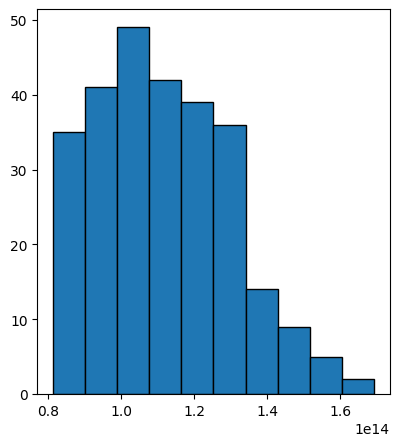

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(y_pred - y_test , edgecolor = 'black')

## Модель SGDRegressor. НЕ стандартизованные (rand_seed = 4)

In [55]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
rand_seed = 4
sgd_reg_nonStd = linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=4,
)
# 2. Обучить модель (подобрать/подогнать параметры модели)  на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
sgd_reg_nonStd.fit(  x_train,  y_train)
# 3. Получить вычисленные(predicted) зн. на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
y_pred = sgd_reg_nonStd.predict ( x_test)
y_pred

array([-5.26680537e+13, -6.03239487e+13, -7.40692697e+13, -6.20806248e+13,
       -7.57322330e+13, -5.79060270e+13, -5.83582554e+13, -7.92104823e+13,
       -3.98254295e+13, -6.12171087e+13, -3.72624024e+13, -3.53941863e+13,
       -6.02574171e+13, -5.30092324e+13, -6.69098446e+13, -6.30445814e+13,
       -4.34439321e+13, -8.47932311e+13, -8.46117190e+13, -7.18304750e+13,
       -5.22288364e+13, -4.00498800e+13, -6.77764119e+13, -4.79137990e+13,
       -5.31734952e+13, -7.21835297e+13, -3.81139525e+13, -5.15237468e+13,
       -6.23927523e+13, -3.62976939e+13, -9.03670060e+13, -6.39885220e+13,
       -3.79018559e+13, -6.99283830e+13, -8.23721612e+13, -6.91228130e+13,
       -4.79050041e+13, -3.22812418e+13, -6.03400875e+13, -3.95759058e+13,
       -4.22699574e+13, -5.25392359e+13, -5.14821238e+13, -5.82596873e+13,
       -3.20812368e+13, -3.50774098e+13, -4.53492557e+13, -5.79060270e+13,
       -3.44387547e+13, -8.29572580e+13, -6.79603412e+13, -6.06598349e+13,
       -4.91577713e+13, -

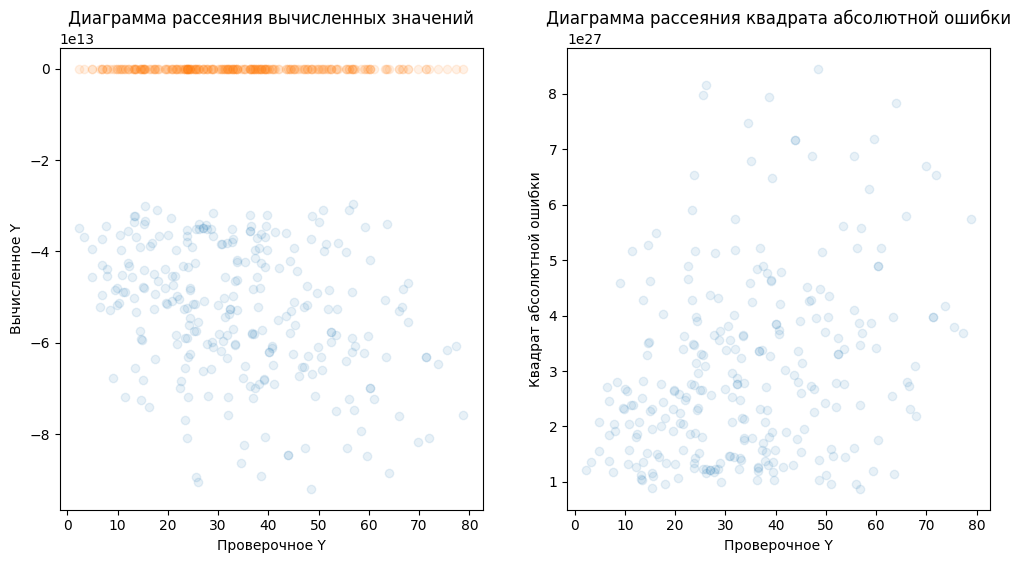

In [56]:
PLOT34(y_test, y_pred)

In [57]:
GET_METRICS_SINGLE(y_test, y_pred)

MAE : 52,962,122,488,638.211 (средняя абсолютная ошибка)
MSE : 3,013,952,481,833,456,024,783,159,296.000000 (среднеквадратичная ошибка)
RMSE: 54,899,476,152,632.421875 (кв. корень из среднеквадратичной ошибки)
R2  : -10,508,884,835,410,858,580,377,600.000 (коэфф. детерминации)


Построим гистограмму остатков (разностей между вычисленными и проверочными)

(array([ 7., 11., 15., 29., 41., 46., 41., 45., 29.,  8.]),
 array([-1.09456069e+14, -1.01165266e+14, -9.28744629e+13, -8.45836598e+13,
        -7.62928567e+13, -6.80020536e+13, -5.97112504e+13, -5.14204473e+13,
        -4.31296442e+13, -3.48388411e+13, -2.65480379e+13]),
 <BarContainer object of 10 artists>)

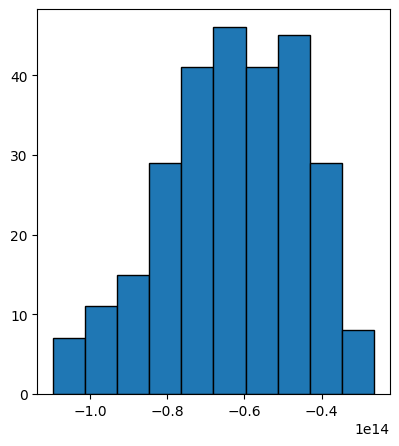

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(y_pred - y_test , edgecolor = 'black')

## Модель SGDRegressor. Cтандартизованные (rand_seed = 8)

In [42]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
rand_seed = 8
sgd_reg_std =   linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=8,
)
# 2. Обучить модель (подобрать/подогнать параметры модели)  на СТАНДАРТИЗИРОВАНОМ проверочном наборе
sgd_reg_std.fit(  xStd_train,  yStd_train)
# 3. Получить вычисленные(predicted) зн. на СТАНДАРТИЗИРОВАНОМ проверочном наборе
yStd_pred = sgd_reg_std.predict ( xStd_test)
yStd_pred

array([-0.70010221, -0.19044581, -0.60635881, -0.11333147,  1.02854182,
        0.17521936, -0.14112195,  1.06734497,  1.49122339,  0.2367003 ,
       -0.16446028, -0.82751691, -0.42641034,  1.13315759,  1.10877497,
        0.65476674, -0.94934057,  1.02573475,  0.43028611, -0.32019061,
        1.30057824,  0.1951516 ,  0.48064773, -0.70748082, -0.88544199,
        0.10525778, -1.00657838, -0.52846919, -0.60811367, -0.73032151,
        0.03684257,  1.20478223, -0.52037918,  1.24198395, -0.40094639,
        0.50671171,  0.19381746,  0.89312152, -0.31763582, -0.60651066,
       -0.23995561,  0.13306553, -0.52509309,  0.0476467 , -0.0755121 ,
       -0.32658676, -0.63469402,  0.17521936, -1.64140113,  1.52601443,
        0.31507279,  1.13404044,  0.10690528, -0.11569602, -0.21799453,
       -0.17843586, -0.01289525, -0.33948066,  0.55118033,  0.65072313,
       -0.28766783,  0.38998279,  1.41390836, -0.15915061,  1.10695108,
       -0.41141942, -0.57199053,  0.28783886,  0.30083784, -0.64

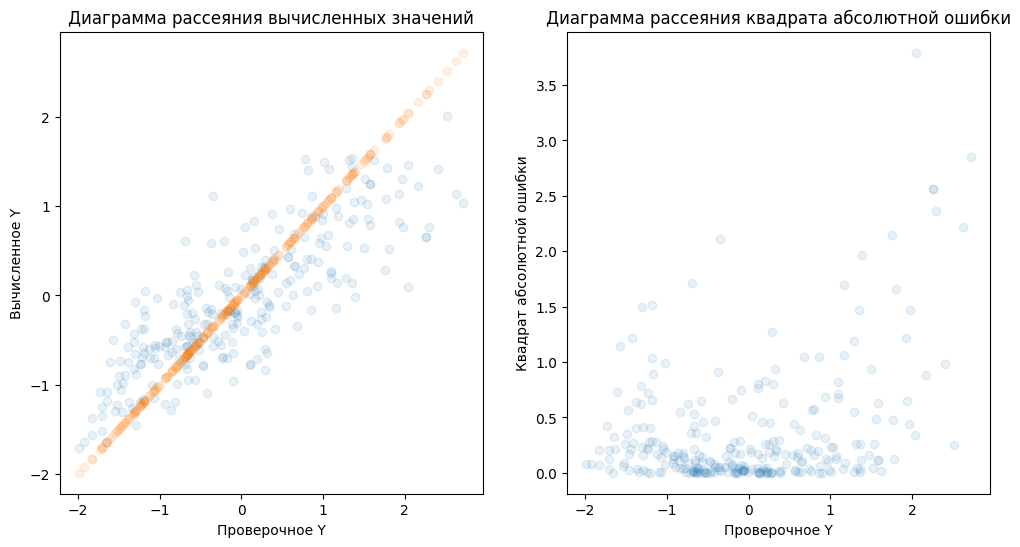

In [43]:
PLOT34(yStd_test, yStd_pred)

In [44]:
GET_METRICS_SINGLE(yStd_test, yStd_pred)

MAE :     0.460 (средняя абсолютная ошибка)
MSE :  0.351080 (среднеквадратичная ошибка)
RMSE:  0.592520 (кв. корень из среднеквадратичной ошибки)
R2  :     0.676 (коэфф. детерминации)


Построим гистограмму остатков (разностей между вычисленными и проверочными)

(array([ 2.,  8., 12., 21., 49., 66., 58., 37., 15.,  4.]),
 array([-1.94687503, -1.60684706, -1.26681909, -0.92679112, -0.58676315,
        -0.24673518,  0.09329279,  0.43332077,  0.77334874,  1.11337671,
         1.45340468]),
 <BarContainer object of 10 artists>)

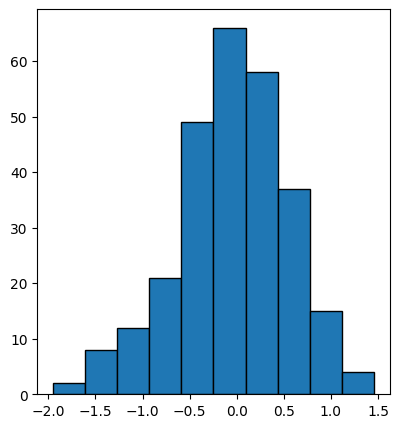

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(yStd_pred - yStd_test , edgecolor = 'black')

## Модель SGDRegressor. Cтандартизованные (rand_seed = 4)

In [59]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
rand_seed = 4
sgd_reg_std =   linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=4,
)
# 2. Обучить модель (подобрать/подогнать параметры модели)  на СТАНДАРТИЗИРОВАНОМ проверочном наборе
sgd_reg_std.fit(  xStd_train,  yStd_train)
# 3. Получить вычисленные(predicted) зн. на СТАНДАРТИЗИРОВАНОМ проверочном наборе
yStd_pred = sgd_reg_std.predict ( xStd_test)
yStd_pred

array([-0.69726447, -0.1831491 , -0.60238331, -0.10592453,  1.03731491,
        0.18245051, -0.13399318,  1.07623216,  1.50857953,  0.24441742,
       -0.15475509, -0.82230579, -0.41959924,  1.14480917,  1.12561462,
        0.66263741, -0.9437552 ,  1.03895144,  0.43886499, -0.31578351,
        1.317145  ,  0.20135029,  0.48566113, -0.70339369, -0.88239617,
        0.11292587, -1.00356818, -0.52230791, -0.60439502, -0.72466366,
        0.04199565,  1.21335729, -0.5143593 ,  1.25072184, -0.39573917,
        0.51114581,  0.20444929,  0.90958569, -0.31082692, -0.60280982,
       -0.23587106,  0.13986359, -0.52067089,  0.05516378, -0.06120368,
       -0.32077044, -0.6307091 ,  0.18245051, -1.63970769,  1.5440303 ,
        0.32296983,  1.14605086,  0.113676  , -0.10880425, -0.21172111,
       -0.17076416, -0.00541028, -0.33332336,  0.55707367,  0.6558481 ,
       -0.27844801,  0.39849995,  1.42617841, -0.15221965,  1.11169422,
       -0.40504486, -0.56622536,  0.29476275,  0.31264929, -0.64

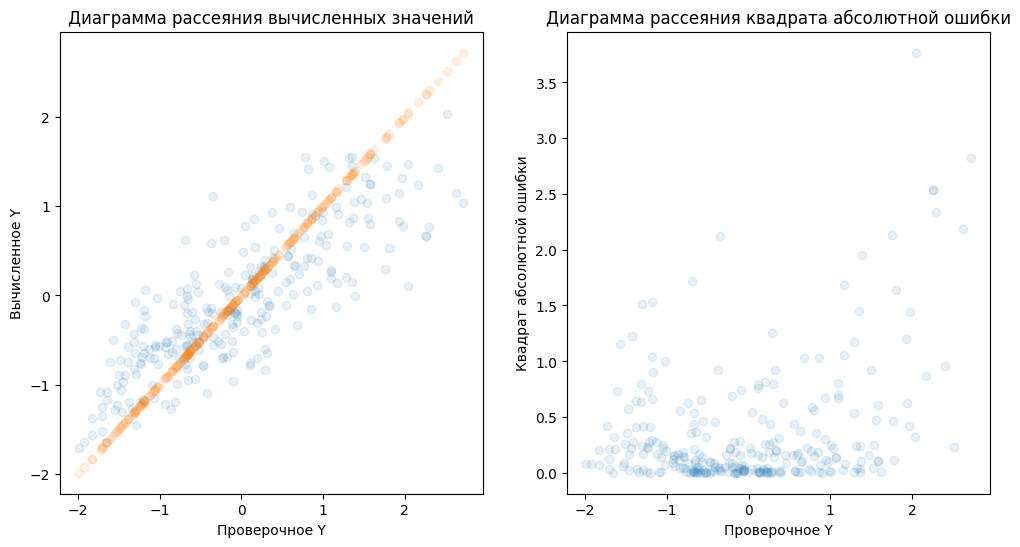

In [60]:
PLOT34(yStd_test, yStd_pred)

In [61]:
GET_METRICS_SINGLE(yStd_test, yStd_pred)

MAE :     0.460 (средняя абсолютная ошибка)
MSE :  0.349397 (среднеквадратичная ошибка)
RMSE:  0.591098 (кв. корень из среднеквадратичной ошибки)
R2  :     0.678 (коэфф. детерминации)


Построим гистограмму остатков (разностей между вычисленными и проверочными)

(array([ 2.,  8., 12., 21., 49., 66., 58., 37., 15.,  4.]),
 array([-1.94035376, -1.6005036 , -1.26065345, -0.92080329, -0.58095313,
        -0.24110297,  0.09874719,  0.43859734,  0.7784475 ,  1.11829766,
         1.45814782]),
 <BarContainer object of 10 artists>)

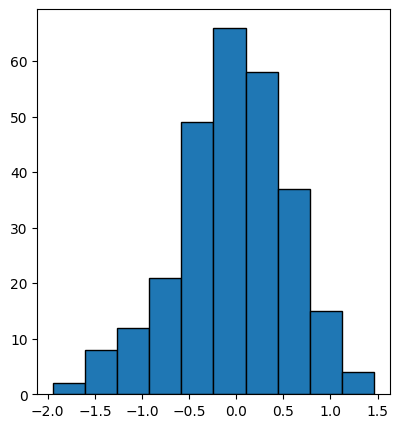

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(yStd_pred - yStd_test , edgecolor = 'black')

## Заключение по полученых результатам

Стандартизация положительно влияет на точность модели. У модели, работающей со стандартизированными данными значительно меньше средняя абсолютная ошибка и кв. корень из среднеквадратичной ошибки, а коэффициент детерминации выше, чем у модели, которая работает с НЕ стандартизированными данными.

Изменение rand_seed значительно влияет на работу модели, использующую НЕ стандартизированные данные. Значения MAE, RMSE, R2 такой модели сильно зависят от начального состояния ГСЧ. В случае модели, которая использует стандартизированные значения, влияние начального состояния ГСЧ не так велико.

Также обучение модели, которая использует стандартизированные данные проходит гораздо быстрее, чем обучение модели, которая использует НЕ стандартизированные данные.

# Кросс-валидация

В виду того, что при разделении на обучающую и проверочные части используется случайный выбор, оценки точности обученой модели будут напрямую зависеть каждого нового случайного распределения образцов. При этом от случая к случаю оценки точности будут изменятся. 

Для полученя более объективной оценки применятеся прием Кросс-валидации (cross-validation) или скользящего контроля — процедура эмпирического оценивания обобщающей способности алгоритмов. 

Обобщающая способность — это способность модели выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, проверочных.

Обучающая (Train) часть выборки разделяется на K-частей, для каждой из которых:
 - происходит создание и обучение модели на данных не принадлежащих текущей K-части
 - полученая промежуточная модель получает оценку точности по образцам K-части

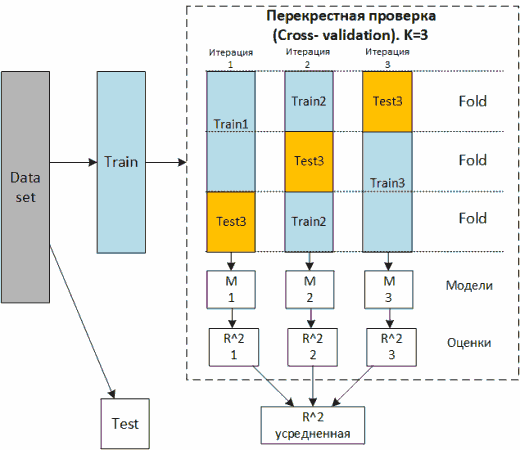



В библиотеке sklearn в пакете sklearn.model_selection присутствуют следующие функции

- cross_val_score (estimator, X, y, cv, scoring) - получение единственной метрики
- cross_validate  (estimator, X, y, cv, scoring) - получение нескольких метрик
- cross_val_predict(estimator, X, y, cv=3) - получить отклики, вычисленные моделью над набором входных значений

где, scoring - Метрики регрессии имеет режимы:
  - r2 - коэфф. детерминации (R2)
  - neg_mean_squared_error - ср. кв. ошибка (MSE)
  - neg_root_mean_squared_error - кв. корень из ср. кв. ошибки (RMSE)

In [50]:
modelForCV =  linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=8,
)

In [51]:
print("R2. НЕ Стандартизированные проверочные данные")
scores_cross = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=x_test,   # Независимые переменные
                                    y=y_test,   # Целевая переменная
                                    cv=3,       # Кол-во K-частей (Fold)
                                    scoring='r2'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross)
print("Усредненное значение метрики:", scores_cross.mean())

R2. НЕ Стандартизированные проверочные данные
Значения метрики по каждому блоку cv: [-7.01617271e+24 -2.79170531e+25 -1.18326517e+24]
Усредненное значение метрики: -1.2038830324662042e+25


In [63]:
print("R2. Стандартизированные проверочные данные")
scores_cross = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=xStd_test,   # Независимые переменные
                                    y=yStd_test,   # Целевая переменная
                                    cv=3,       # Кол-во K-частей (Fold)
                                    scoring='r2'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross)
print("Усредненное значение метрики:", scores_cross.mean())

R2. Стандартизированные проверочные данные
Значения метрики по каждому блоку cv: [0.57895775 0.69309416 0.72136079]
Усредненное значение метрики: 0.6644708991407239


In [53]:
print("RMSE. НЕ Стандартизированные проверочные данные")
scores_cross = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=x_test,   # Независимые переменные
                                    y=y_test,   # Целевая переменная
                                    cv=3,       # Кол-во K-частей (Fold)
                                    scoring='neg_root_mean_squared_error'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross)
print("Усредненное значение метрики:", scores_cross.mean())

RMSE. НЕ Стандартизированные проверочные данные
Значения метрики по каждому блоку cv: [-4.39969289e+13 -9.14567745e+13 -1.78864265e+13]
Усредненное значение метрики: -51113376650762.46


In [65]:
print("RMSE. Стандартизированные проверочные данные")
scores_cross = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=xStd_test,   # Независимые переменные
                                    y=yStd_test,   # Целевая переменная
                                    cv=3,       # Кол-во K-частей (Fold)
                                    scoring='neg_root_mean_squared_error'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross)
print("Усредненное значение метрики:", scores_cross.mean())

RMSE. Стандартизированные проверочные данные
Значения метрики по каждому блоку cv: [-0.66293616 -0.58982112 -0.53387588]
Усредненное значение метрики: -0.5955443870513021


|Оценка|на станд.| на НЕ станд.|
|-|-|-|
|Разделений|k=3|k=3
|R2|[0.57895775 0.69309416 0.72136079]|[-7.01617271e+24 -2.79170531e+25 -1.18326517e+24]|
|R2 средн|0.6644708991407239|-1.2038830324662042e+25|
|RMSE|[-0.66293616 -0.58982112 -0.53387588]|[-4.39969289e+13 -9.14567745e+13 -1.78864265e+13]|
|RMSE средн|-0.5955443870513021|-51113376650762.46|

## Заключение о величине коридора изменений оценок моделей

Величины коридоров изменений оценок у моделей, которые работают с НЕ стандартизированными данными значительно больше, чем у моделей, которые работают со стандартизированными данными. У моделей, которые используют стандартизированные данные средние оценки по модулю не превышают 1 (0.664 для R2 и -0.596 для RMSE), в то время как средние оценки моделей, использующих НЕ стандартизированные данные достигают невероятно больших значений. Это говорит о преимуществах моделей, которые используют стандартизированные данные, по отношению к моделям, которые используют НЕ стандартизированные данные.

# Итоговые, сводные результаты и выводы.

Исследовали влияние операции приведения данных к новым шкалам (стандартизации) на обучение моделей МО при решении задачи регрессии, с использованием библиотеки scikit-learn.
Познакомились с приемом перекрестной проверки данных (cross-validation).

В ходе лабораторной работы было установлено, что обучать модели, использующие стандартизированные данные гораздо быстрее, проще и эффективнее, чем модели, которые используют НЕ стандартизированные данные. Познакомились с различными методами стандартизации и оценки влияния стандартизации.